<a href="https://colab.research.google.com/github/sajan-sarker/machine-learning/blob/main/coffee_roasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [5]:
# Dataset
rng = np.random.default_rng(2)
X_train = rng.random(400).reshape(-1,2)
X_train[:,1] = X_train[:,1] * 4 + 11.5          # 12-15 min is best
X_train[:,0] = X_train[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
y_train = np.zeros(len(X_train)).reshape(-1,1)

i=0
for t,d in X_train:
  y = -3/(260-175)*t + 21
  if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
    y_train[i] = 1
  else:
    y_train[i] = 0
  i += 1

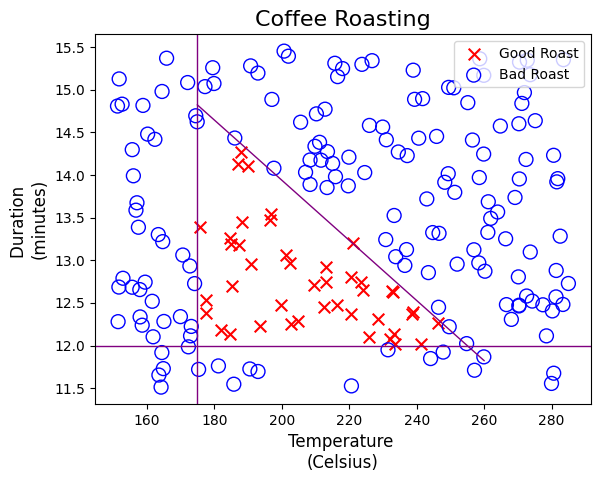

In [8]:
#plot data
X = X_train
Y = y_train.reshape(-1,)
fig, ax = plt.subplots(1,1,)
ax.scatter(X[Y==1,0],X[Y==1,1], s=70, marker='x', c='red', label="Good Roast" )
ax.scatter(X[Y==0,0],X[Y==0,1], s=100, marker='o', facecolors='none', edgecolors='blue',linewidth=1,  label="Bad Roast")
tr = np.linspace(175,260,50)
ax.plot(tr, (-3/85) * tr + 21, color='purple',linewidth=1)
ax.axhline(y=12,color='purple',linewidth=1)
ax.axvline(x=175,color='purple',linewidth=1)
ax.set_title(f"Coffee Roasting", size=16)
ax.set_xlabel("Temperature \n(Celsius)",size=12)
ax.set_ylabel("Duration \n(minutes)",size=12)
ax.legend(loc='upper right')
plt.show()

In [11]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)
X_train = norm_l(X_train)

In [12]:
X_train = np.tile(X_train, (1000, 1))
y_train = np.tile(y_train, (1000,1))
print(X_train.shape, y_train.shape)

(200000, 2) (200000, 1)


In [15]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(units=3, activation='sigmoid', name='L1'),
        Dense(units=1, activation='sigmoid', name='L2')
    ]
)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2554
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1242
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1102
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0266
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0142
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0095
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0067
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0048
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0034
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0025


In [20]:
# check weights & bias
w1, b1 = model.get_layer('L1').get_weights()
w2, b2 = model.get_layer('L2').get_weights()
w1, b1, w2, b2

(array([[ 14.158879  ,  -0.10033255, -10.922259  ],
        [ 11.82945   ,  -8.929013  ,  -0.1989014 ]], dtype=float32),
 array([  1.745796, -11.152572, -11.943854], dtype=float32),
 array([[-41.908604],
        [-44.059563],
        [-48.158318]], dtype=float32),
 array([25.146229], dtype=float32))

In [25]:
# set weights & bias
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])

model.get_layer('L1').set_weights([W1, b1])
model.get_layer('L2').set_weights([W2, b2])

In [26]:
# check updated weights & bias
w1, b1 = model.get_layer('L1').get_weights()
w2, b2 = model.get_layer('L2').get_weights()
w1, b1, w2, b2

(array([[-8.94,  0.29, 12.89],
        [-0.17, -7.34, 10.79]], dtype=float32),
 array([-9.87, -9.28,  1.01], dtype=float32),
 array([[-31.38],
        [-27.86],
        [-32.79]], dtype=float32),
 array([15.54], dtype=float32))

In [28]:
# predictions
X_test = np.array([[200, 13.9], [200, 17]])
X_test = norm_l(X_test)
predictions = model.predict(X_test)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[9.625127e-01],
       [3.031606e-08]], dtype=float32)

In [29]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    yhat[i] = 1
  else:
    yhat[i] = 0
print(yhat)

[[1.]
 [0.]]
